# Day 08. Exercise 03
# Overfitting

## 0. Imports

In [46]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV

## 1. Preprocessing

1. Read the file `dayofweek.csv` to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`.
3. Using, for example, `value_counts()` to check if the distribution of classes is similar in train and test.
4. Use the additional parameter `stratify=` and check the distribution again, now it should be more or less similar in both datasets.

In [2]:
df = pd.read_csv('../data/dayofweek.csv')
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.756764,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.724861,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.692958,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.661055,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1682,-0.629151,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1683,-0.597248,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1684,-0.565345,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
x = df.drop('dayofweek', axis=1)
y = df['dayofweek']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=21)

In [6]:
X_train.value_counts().head()

numTrials  hour       uid_user_0  uid_user_1  uid_user_10  uid_user_11  uid_user_12  uid_user_13  uid_user_14  uid_user_15  uid_user_16  uid_user_17  uid_user_18  uid_user_19  uid_user_2  uid_user_20  uid_user_21  uid_user_22  uid_user_23  uid_user_24  uid_user_25  uid_user_26  uid_user_27  uid_user_28  uid_user_29  uid_user_3  uid_user_30  uid_user_31  uid_user_4  uid_user_6  uid_user_7  uid_user_8  labname_code_rvw  labname_lab02  labname_lab03  labname_lab03s  labname_lab05s  labname_laba04  labname_laba04s  labname_laba05  labname_laba06  labname_laba06s  labname_project1
 0.966008  -1.393108  0           0           0            0            0            0            0            0            0            0            0            0            0           0            0            0            0            0            0            1            0            0            0            0           0            0            0           0           0           0           0            

In [7]:
X_test.value_counts().head()

numTrials  hour       uid_user_0  uid_user_1  uid_user_10  uid_user_11  uid_user_12  uid_user_13  uid_user_14  uid_user_15  uid_user_16  uid_user_17  uid_user_18  uid_user_19  uid_user_2  uid_user_20  uid_user_21  uid_user_22  uid_user_23  uid_user_24  uid_user_25  uid_user_26  uid_user_27  uid_user_28  uid_user_29  uid_user_3  uid_user_30  uid_user_31  uid_user_4  uid_user_6  uid_user_7  uid_user_8  labname_code_rvw  labname_lab02  labname_lab03  labname_lab03s  labname_lab05s  labname_laba04  labname_laba04s  labname_laba05  labname_laba06  labname_laba06s  labname_project1
-0.788667  -1.860806  0           0           1            0            0            0            0            0            0            0            0            0            0           0            0            0            0            0            0            0            0            0            0            0           0            0            0           0           0           0           0            

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=21, stratify=y)

In [9]:
X_train.value_counts().head()

numTrials  hour       uid_user_0  uid_user_1  uid_user_10  uid_user_11  uid_user_12  uid_user_13  uid_user_14  uid_user_15  uid_user_16  uid_user_17  uid_user_18  uid_user_19  uid_user_2  uid_user_20  uid_user_21  uid_user_22  uid_user_23  uid_user_24  uid_user_25  uid_user_26  uid_user_27  uid_user_28  uid_user_29  uid_user_3  uid_user_30  uid_user_31  uid_user_4  uid_user_6  uid_user_7  uid_user_8  labname_code_rvw  labname_lab02  labname_lab03  labname_lab03s  labname_lab05s  labname_laba04  labname_laba04s  labname_laba05  labname_laba06  labname_laba06s  labname_project1
-0.756764   0.945382  0           1           0            0            0            0            0            0            0            0            0            0            0           0            0            0            0            0            0            0            0            0            0            0           0            0            0           0           0           0           0            

In [10]:
X_test.value_counts().head()

numTrials  hour       uid_user_0  uid_user_1  uid_user_10  uid_user_11  uid_user_12  uid_user_13  uid_user_14  uid_user_15  uid_user_16  uid_user_17  uid_user_18  uid_user_19  uid_user_2  uid_user_20  uid_user_21  uid_user_22  uid_user_23  uid_user_24  uid_user_25  uid_user_26  uid_user_27  uid_user_28  uid_user_29  uid_user_3  uid_user_30  uid_user_31  uid_user_4  uid_user_6  uid_user_7  uid_user_8  labname_code_rvw  labname_lab02  labname_lab03  labname_lab03s  labname_lab05s  labname_laba04  labname_laba04s  labname_laba05  labname_laba06  labname_laba06s  labname_project1
0.966008   -1.393108  0           0           0            0            0            0            0            0            0            0            0            0            0           0            0            0            0            0            0            1            0            0            0            0           0            0            0           0           0           0           0            

## 2. Baseline models

1. Train exactly the same baseline models from the previous exercise and calculate the accuracies using the test dataset with stratification.
2. Did all the models show the similar values of the metric? Which one has the largest difference comparing the current exercise and the previous? Put the answer to the markdown cell in the end of the section.

### a. Logreg

In [11]:
logreg = LogisticRegression(random_state=21, fit_intercept=False)
logreg.fit(X_train, y_train)

LogisticRegression(fit_intercept=False, random_state=21)

In [12]:
y_pred = logreg.predict(X_test)
accuracy_score(y_test, y_pred)

0.6272189349112426

### b. SVM

In [14]:
svc = SVC(kernel='linear', probability=True, random_state=21)
svc.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=21)

In [15]:
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.7159763313609467

### c. Decision tree

In [20]:
tree = DecisionTreeClassifier(max_depth=4, random_state=21)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=21)

In [21]:
y_pred = tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.5295857988165681

### d. Random forest

In [22]:
forest = RandomForestClassifier(max_depth=25, n_estimators=100, random_state=21)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, random_state=21)

In [23]:
y_pred = forest.predict(X_test)
accuracy_score(y_test, y_pred)

0.9289940828402367

Самое большое расхождение у рандом фореста

## 3. Crossvalidation

We could play with parameters of the model trying to achive a better accuracy on the test dataset, but it is a bad practice. It leads us again to overfitting. Test dataset is only for checking quality of a final model.

But there is another way of solving the problem – crossvalidation. It does not use test dataset, but creates one more split of train dataset. Again, there are different ways of doing it, but the common thing is that there is a validation dataset that is used for hyperparameters optimization.

1. Using `cross_val_score` with `cv=10` calculate the mean accuracy and standard deviation for every model that you used before (logreg with `solver='liblinear'`, SVC, decision tree, random forest).

### a. Logreg

In [24]:
logreg = LogisticRegression(solver='liblinear', random_state=21)
scores = cross_val_score(logreg, x, y, scoring='accuracy', cv=10)

In [25]:
np.mean(scores)

0.45649126514511124

In [26]:
np.std(scores)

0.16478021442150131

### b. SVM

In [27]:
svc = SVC(kernel='linear', probability=True, random_state=21)
scores = cross_val_score(svc, x, y, scoring='accuracy', cv=10)
np.mean(scores)


0.5051986475063398

In [28]:
np.std(scores)

0.15857963555262297

### c. Decision tree

In [29]:
tree = DecisionTreeClassifier(max_depth=4, random_state=21)
scores = cross_val_score(tree, x, y, scoring='accuracy', cv=10)
np.mean(scores)

0.3883523527754297

In [30]:
np.std(scores)

0.11835394295385691

### d. Random forest

In [31]:
forest = RandomForestClassifier(max_depth=25, n_estimators=100, random_state=21)
scores = cross_val_score(forest, x, y, scoring='accuracy', cv=10)
np.mean(scores)

0.6607847280924204

In [32]:
np.std(scores)

0.17462799234675505

## 4. Optimization

1. Choose the best model and play a little bit with the parameters on cross-validation, find a good enough parameter or a combination of the parameters.
2. Calculate the accuracy for the final model on the test dataset.
3. Draw a plot that displays the top-10 most  important features for that model.
4. Save the model using `joblib`.
5. Load the model, make predictions for the test dataset and calculate the accuracy.

In [43]:
model = RandomForestClassifier(max_depth=36, n_estimators=100, random_state=21)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9378698224852071

In [44]:
def plot_features(coefs, features, n=10):
    fig, ax = plt.subplots(figsize=(15, 8))
    t = dict(zip(features, coefs))
    sp = sorted(t.items(), key=lambda x: (-x[1], x[0]))
    arr = np.array([i[1] for i in sp])[:n]
    col = np.array([i[0] for i in sp])[:n]
    # coefs /= coefs.sum()
    # indices = coefs.argsort()[::-1][:n]
    ax.barh(np.arange(n), 
    arr, 
    color='blue')
    ax.set_yticks(np.arange(n))
    ax.set_yticklabels(col)
    ax.invert_yaxis()
    plt.show()

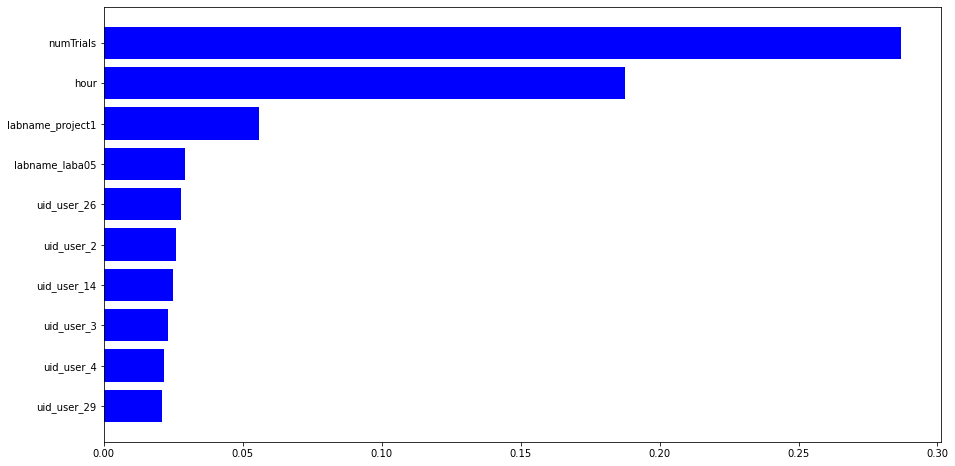

In [45]:
plot_features(model.feature_importances_, x.columns)

In [48]:
joblib.dump(model, '../data/best_model.joblib')

['../data/best_model.joblib']

In [50]:
best_model = joblib.load('../data/best_model.joblib')

In [51]:
y_pred = best_model.predict(X_test)

In [52]:
accuracy_score(y_test, y_pred)

0.9378698224852071